In [108]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [19]:
data_variants=pd.read_csv('training_variants')
data_text=pd.read_csv('training_text',sep='\|\|',engine='python',names=['ID','TEXT'],skiprows=1)

In [20]:
data_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [21]:
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [80]:
data_text[data_text.isnull().any(axis=1)]

,ID,TEXT


In [22]:
stop_words=set(stopwords.words('english'))#downloading stopwords

In [24]:
def data_text_preprocess(text):#preprocessing can be increased to achieve better results
    if type(text) is not int:
        string=''
        text=re.sub('[^a-zA-Z0-9\n]', ' ',str(text))
        text=re.sub('\s+',' ',str(text))
        text=text.lower()
        
        for word in text.split():
            if not word in stop_words:
                string += word + ' '
        return(string)
        

In [26]:
data_text['TEXT'] = data_text.apply(lambda row: data_text_preprocess(row['TEXT']), axis=1)#use .apply method for looping
    

In [27]:
data_text.head(9)

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...
5,5,oncogenic mutations monomeric casitas b lineag...
6,6,oncogenic mutations monomeric casitas b lineag...
7,7,cbl negative regulator activated receptor tyro...
8,8,abstract juvenile myelomonocytic leukemia jmml...


In [58]:
#now lets merge both dataframes
final_data = pd.merge(data_variants,data_text,on='ID',how='left')

In [59]:
final_data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [68]:
final_data[final_data['Gene']=='CBL'].head()

,ID,Gene,Variation,Class,TEXT
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
5,5,CBL,V391I,4,oncogenic mutations monomeric casitas b lineag...


In [76]:
final_data[final_data['TEXT']=='nan'].head()# answer is not coming

,ID,Gene,Variation,Class,TEXT


In [67]:
final_data.iloc[[2755]]#nan is present but cannot be obtained,some problem is occuring

,ID,Gene,Variation,Class,TEXT
2755,2755,BRAF,G596C,7,nan


In [72]:
final_data[final_data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


In [89]:
final_data=final_data.drop(final_data.index[[1109,1277,1407,1639,2755]])## here we dropped all the rows containing null values

** training testing and validation **

In [92]:
final_data['Class'].values

array([1, 2, 2, ..., 1, 4, 4], dtype=int64)

In [94]:
from sklearn.cross_validation import train_test_split


In [105]:
X_train, X_test, y_train, y_test = train_test_split(final_data, final_data['Class'], test_size=0.2,stratify=final_data['Class'])
X_train, x_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train)

In [106]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', x_cv.shape[0])

Number of data points in train data: 2118
Number of data points in test data: 663
Number of data points in cross validation data: 530


In [107]:
train_class_distribution = X_train['Class'].value_counts().sortlevel()# sortlevel shows the distribution sorted manner from 1 to 9
test_class_distribution = X_test['Class'].value_counts().sortlevel()
cv_class_distribution = x_cv['Class'].value_counts().sortlevel()

C:\Users\sikandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.
C:\Users\sikandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  
C:\Users\sikandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


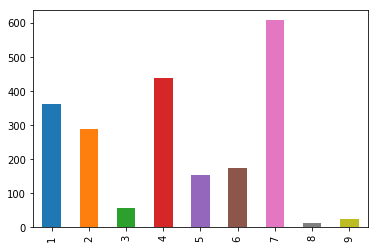

In [109]:
train_class_distribution.plot(kind='bar')

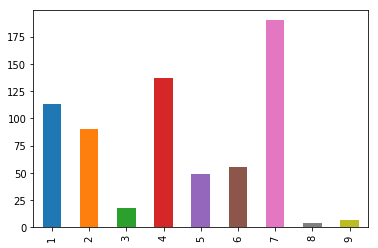

In [110]:
test_class_distribution.plot(kind='bar')

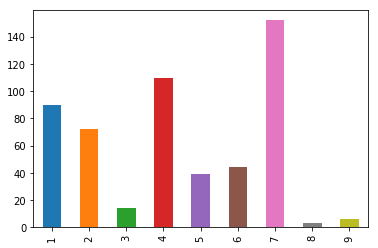

In [111]:
cv_class_distribution.plot(kind='bar')

In [112]:
# IT SEEMS that all graphs are of equal proportions
# IT SHOWS THAT ALL CLASSES ARE DISTRIBUTED IN EQUAL MANNER IN EACH TRAIN,TEST AND CROSS VALLIDATION